### grp

## Hands-On Machine Learning with Scikit-Learn & TensorFlow

## CHAPTER 4: Training Models

## Training Types:
-  direct "closed-form" normal equation:
    -  directly computes model parameters that best fit the model to the training set
    -  minimizes the cost function over the training set
-  iterative optimization approach => Gradient Descent:
    -  gradually tweaks model parameters (coefficients) to minimize the cost function over the training set
    -  types:
        -  Batch GD
        -  Mini-batch GD
        -  Stochastic GD

### Linear Regression:
-  https://en.wikipedia.org/wiki/Linear_regression
-  makes prediction by computing a weighted sum of the input features plus a constant called the _bias term_ or _intercept term_
-  aims to find the value of θ to minimize the perf. measure (RMSE, MSE, etc.) of regression model

### Normal Equation:
-  https://en.wikipedia.org/wiki/Linear_least_squares
-  finds the value of θ that minimizes the cost function
-  performs very slow when number of features is large

### Gradient Descent:
-  https://en.wikipedia.org/wiki/Gradient_descent
-  https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html
-  https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
-  optimization algorithm that finds the optimal solution
-  tweaks parameters iteratively in order to minimize the cost function
-  works best when all features have a similar scale
-  once the gradient is zero the minimum has been reached!
-  **needs to compute the gradient of the cost function with regards to each model parameter θj => partial derivative**

### Batch Gradient Descent:
-  calculates over the full training set
-  performs slowly on very large training sets
-  uses whole batch of training data at every step

### Stochastic Gradient Descent:
-  selects random instance in the training set at every step and computes the gradients based only on that randomly selected instance
-  best method for large training sets

### Mini-batch Gradient Descent:
-  computes gradients on small random sets of instances called _mini-batches_
-  helps boost performance from hardware optimization of matrix operations such as when using GPUs

### Polynomial Regression:
-  https://en.wikipedia.org/wiki/Polynomial_regression
-  adds powers to each feature as new features then trains a linear model
-  fits a nonlinear relationship

### Learning Curve:
-  plots of the model's performance of the training set and the validation set as a function of the training set size (training iterations)

### Overfitting & Underfitting:
-  overfit => model performs well on training data; model performs poorly on testing data / cv metrics:
    -  solution => feed more data until validation error reaches training error; constrain (regularize) the weights
-  underfit => model performs poorly on training data and testing data / cv metrics:
    -  solition => use more complex model / find or transform better features

### Bias / Variance Tradeoff:
-  Bias => wrong assumptions; likely leads to overfitting
-  Variance => variance among training data likely leads to overfitting; model w/ many degrees of freedom
-  Irreducible error => 'noise' with data; cleaning (scaling, remove outliers, etc.) the data will help this
-  **inceasing a model's complexity will typically increase the variance and reduce bias**
-  **decreasing a model's complexity will typically increase the bias and reduce the variance**

### Regularization:
-  helps reduce overfitting of the model
-  linear regularized => constraining the wegihts of the model:
    -  Ridge Regression => https://en.wikipedia.org/wiki/Tikhonov_regularization:
    -  Lasso Regression => https://en.wikipedia.org/wiki/Lasso_(statistics)
    -  Elastic Net => https://en.wikipedia.org/wiki/Elastic_net_regularization
-  polynomial regularized => reduce number of polynomial degrees

### Ridge Regression (L2):
-  α controls how much to regularize the model:
    -  α = 0 (ridge regression is just a linear regression)
    -  α is very large (all weights end up close to zero resulting in flat line going through data's mean)
    -  L2 => adds a regularization term to the cost function equal to half the square of the L2 norm of the weight vector

### Lasso Regression (L1):
-  L1 => adds a regularization term to the cost function equal to the L1 norm of the weight vector
-  tends to completely eliminate the weights of the least important features (i.e. sets them to zero)
-  outputs a sparse model

### Elastic Net:
-  mix of Ridge and Lasso regularization terms
-  contol the mix via "r" parameter
-  r=1 => Ridge
-  r=0 => Lasso

### Which Regularization to Use?
-  preferable to use a little bit of regularization
-  Ridge is a good default if all features are useful
-  Lasso / Elastic Net are good if only a few features are actually useful:
    -  because they tend to reduce the useless features' weights down to zero

### Early Stopping:
-  stop training as soon as the validation error reaches a minimum

### Logistic Regression:
-  https://en.wikipedia.org/wiki/Logistic_regression
-  estimates the probability that an instance belongs to a particular class
-  model computes a weighted sum of the input features (plus a bias term)
-  outputs the _logistic_ aka _logit_ which is a _sigmoid function_ => S-shaped outputs a number between 0 and 1
-  decision boundary => threshold at which model decides which class instance belongs
-  cost function => log loss (when classification is 2 classes)

### Softmax Regression (Multinomial Logistic Regression):
-  https://en.wikipedia.org/wiki/Multinomial_logistic_regression
-  supports multiple classes
-  first computes a score for each class then estimates probability of each class by applying the _softmax function_ to scores
-  cost function => cross entropy (when classification is multiclass):
    -  https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

## _Exercises_

In [1]:
import sklearn
print(sklearn.__version__)

0.20.0


### normal equation

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

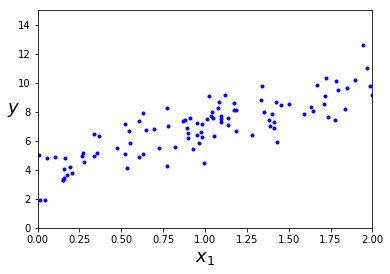

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.92060181],
       [3.05525401]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.92060181],
       [10.03110983]])

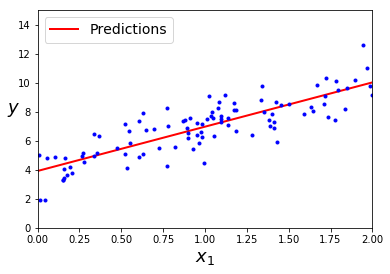

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [47]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(-0.42622254937443493, array([0.17832294, 0.63042101]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.92060181],
       [10.03110983]])

### batch gradient descent

In [10]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[3.92060181],
       [3.05525401]])

In [12]:
X_new_b.dot(theta)

array([[ 3.92060181],
       [10.03110983]])

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

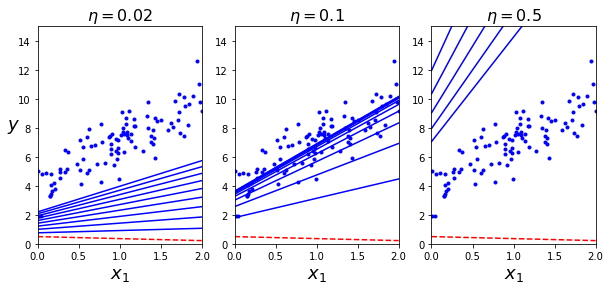

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

### stochastic gradient descent

In [15]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

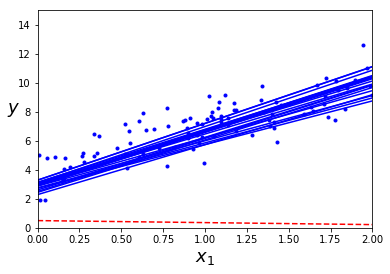

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

In [17]:
theta

array([[3.86571094],
       [3.06384624]])

### sklearn SGD

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.92081597]), array([3.04391588]))

### sklearn polynomial regression

In [20]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

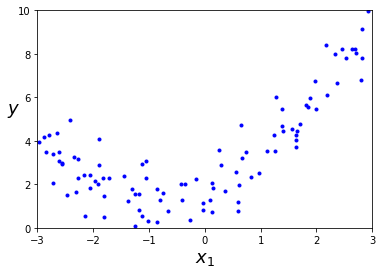

In [22]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [24]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

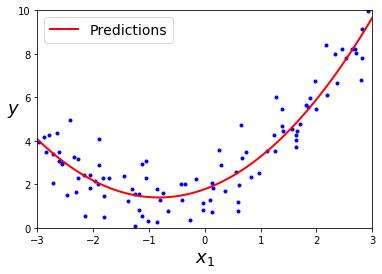

In [26]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### sklearn linear learning curves

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

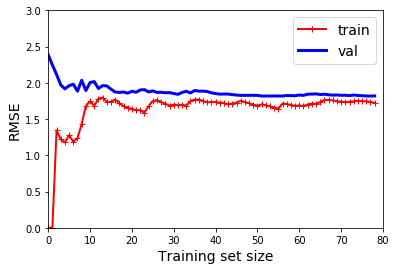

In [28]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()                                      # not shown

### sklearn polynomial learning curve

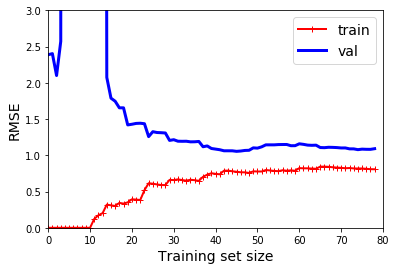

In [29]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

### sklearn ridge regression

In [30]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82497007]])

In [31]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.82062962])

### sklearn lasso regression

In [32]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

### elastic net regression

In [33]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

### early stopping

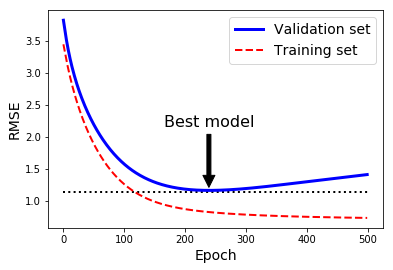

In [34]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [35]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [36]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
        learning_rate='constant', loss='squared_loss', max_iter=1,
        n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
        verbose=0, warm_start=True))

### sklearn logistic regression

In [37]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [38]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

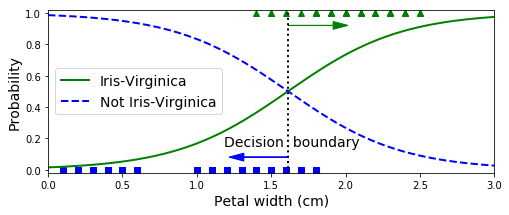

'\nTherefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if\nthe petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else\nit will predict that it is not (even if it is not very confident):\n'

In [40]:
# model's estimated probabilities
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

'''
Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if
the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else
it will predict that it is not (even if it is not very confident):
'''

In [41]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


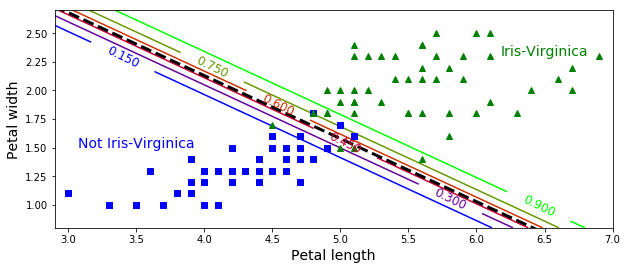

In [49]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### softmax regression

In [43]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
softmax_reg.predict([[5, 2]]) # 5cm long; 2cm wide petals => predicts class 2 (Iris-Virginica)

array([2])

In [45]:
softmax_reg.predict_proba([[5, 2]]) # w/ 94.2% probability

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

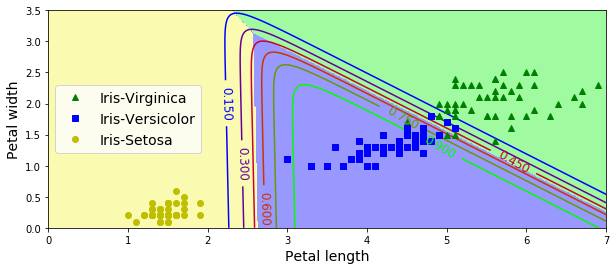

In [46]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

### additional exercises:
https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb

1. What Linear Regression training algorithm can you use if you have a training set with millions of features?
2. Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?
3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?
4. Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?
5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?
6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?
7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?
8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?
9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?
10. Why would you want to use: Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?Lasso instead of Ridge Regression? Elastic Net instead of Lasso?
11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?
12. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).

### grp